In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')


  Customer_ID  Age  Gender Account_Type  Credit_Score  Transaction_Amount  \
0       C1000   56    Male      Savings           377            10311.05   
1       C1001   69   Other     Business           756            91883.18   
2       C1002   46    Male     Business           300            79029.46   
3       C1003   32    Male       Salary           350             2399.96   
4       C1004   60  Female      Savings           745            65171.58   

  Transaction_Type Transaction_Mode Is_New_Device Unusual_Pattern Location  \
0              UPI         Domestic            No              No    Delhi   
1              UPI    International            No             Yes   London   
2             Card    International            No              No  Chennai   
3              ATM    International           Yes              No  Chennai   
4             NEFT    International            No             Yes   Mumbai   

   Is_Scam Scam_Type  OTP_Failed_Attempts  Velocity_Transaction_Coun

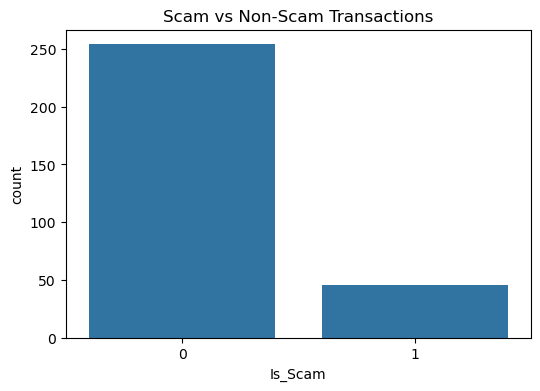

In [2]:
df = pd.read_csv("Downloads\\enhanced_scam_detection_dataset.csv")

print(df.head())
print(df.info())
print(df['Is_Scam'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Is_Scam')
plt.title("Scam vs Non-Scam Transactions")
plt.show()


In [3]:
df_clean = df.copy()

# Drop ID columns
df_clean = df_clean.drop(['Customer_ID', 'Transaction_Type', 'Location'], axis=1)

# Label Encoding for categorical
categorical_cols = ['Gender', 'Account_Type', 'Transaction_Mode', 'Is_New_Device', 
                    'Unusual_Pattern', 'Scam_Type']
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [4]:
# Features and target
X = df_clean.drop('Is_Scam', axis=1)
y = df_clean['Is_Scam']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [6]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [7]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.78      0.88         9

    accuracy                           0.97        60
   macro avg       0.98      0.89      0.93        60
weighted avg       0.97      0.97      0.96        60



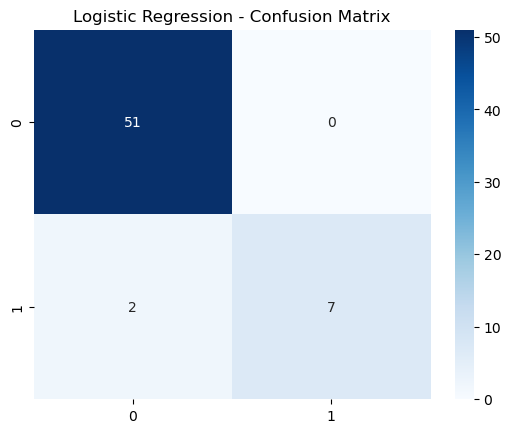


Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



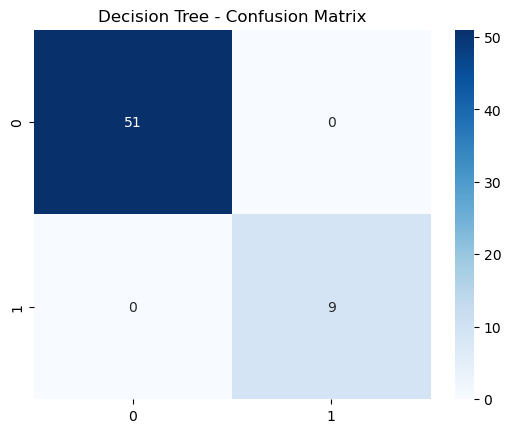


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



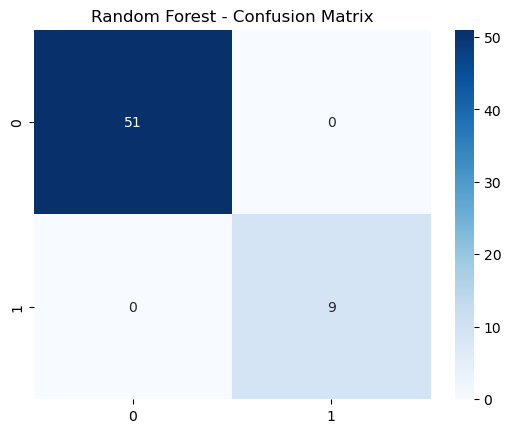

In [8]:
def evaluate_model(y_true, y_pred, name):
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [9]:

model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.2334 - loss: 0.8623 - val_accuracy: 0.4375 - val_loss: 0.7349
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5108 - loss: 0.7084 - val_accuracy: 0.7083 - val_loss: 0.6182
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7203 - loss: 0.6031 - val_accuracy: 0.8333 - val_loss: 0.5279
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8355 - loss: 0.5202 - val_accuracy: 0.8542 - val_loss: 0.4575
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8472 - loss: 0.4630 - val_accuracy: 0.8750 - val_loss: 0.4021
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8651 - loss: 0.3957 - val_accuracy: 0.8750 - val_loss: 0.3548
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8781 - loss: 0.3343 - val_accuracy: 0.8750 - val_loss: 0.3148
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8700 - loss: 0.3457 - val_accuracy: 0.9167 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

Model: Deep Learning NN
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.44      0.62         9

    accuracy                           0.92        60
   macro avg       0.96      0.72      0.78        60
weighted avg       0.92      0.92      0.90        60



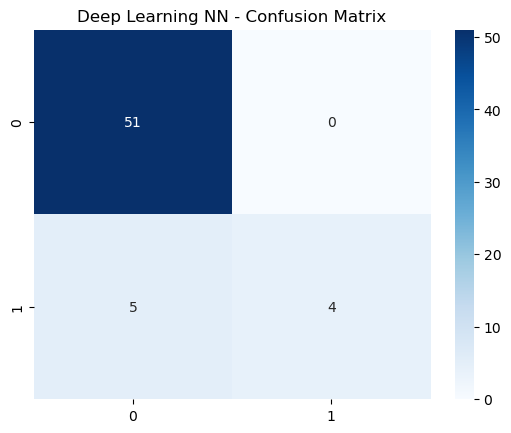

In [10]:
# Evaluate on test
dl_pred = model.predict(X_test)
dl_pred = (dl_pred > 0.5).astype(int)
evaluate_model(y_test, dl_pred, "Deep Learning NN")


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.6361 - loss: 0.6779 - val_accuracy: 0.7708 - val_loss: 0.6639
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7840 - loss: 0.6553 - val_accuracy: 0.9167 - val_loss: 0.6389
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8937 - loss: 0.6229 - val_accuracy: 0.9167 - val_loss: 0.6143
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9703 - loss: 0.5962 - val_accuracy: 0.9375 - val_loss: 0.5884
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9786 - loss: 0.5672 - val_accuracy: 0.9167 - val_loss: 0.5620
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9825 - loss: 0.5359 - val_accuracy: 0.9167 - val_loss: 0.5337
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9912 - loss: 0.5101 - val_accuracy: 0.9167 - val_loss: 0.5041
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9963 - loss: 0.4750 - val_accuracy: 0.9583 - 

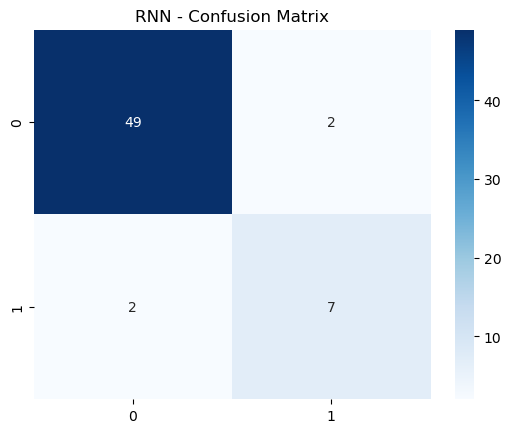

In [11]:
# RNN Setup (if you want sequence-style modeling)
# Here we just reshape input as time series of 1 timestep
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model = Sequential()
rnn_model.add(LSTM(32, input_shape=(1, X_train.shape[1])))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate RNN
rnn_pred = rnn_model.predict(X_test_rnn)
rnn_pred = (rnn_pred > 0.5).astype(int)
evaluate_model(y_test, rnn_pred, "RNN")

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Utility function to calculate metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': round(accuracy_score(y_true, y_pred), 4),
        'Precision': round(precision_score(y_true, y_pred), 4),
        'Recall': round(recall_score(y_true, y_pred), 4),
        'F1 Score': round(f1_score(y_true, y_pred), 4)
    }

# Collect metrics for each model
results = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [13]:
# Logistic Regression
metrics_lr = get_metrics(y_test, y_pred_lr)
# Decision Tree
metrics_dt = get_metrics(y_test, y_pred_dt)
# Random Forest
metrics_rf = get_metrics(y_test, y_pred_rf)
# Deep Learning NN
metrics_dl = get_metrics(y_test, dl_pred)
# RNN
metrics_rnn = get_metrics(y_test, rnn_pred)

In [14]:

# Fill results
for name, metrics in zip(
    ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Deep Learning NN', 'RNN'],
    [metrics_lr, metrics_dt, metrics_rf, metrics_dl, metrics_rnn]
):
    results['Algorithm'].append(name)
    results['Accuracy'].append(metrics['Accuracy'])
    results['Precision'].append(metrics['Precision'])
    results['Recall'].append(metrics['Recall'])
    results['F1 Score'].append(metrics['F1 Score'])

# Create and display final comparison table
comparison_df = pd.DataFrame(results)
print("🔍 Model Performance Comparison:\n")
print(comparison_df)

🔍 Model Performance Comparison:

             Algorithm  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9667     1.0000  0.7778    0.8750
1        Decision Tree    1.0000     1.0000  1.0000    1.0000
2        Random Forest    1.0000     1.0000  1.0000    1.0000
3     Deep Learning NN    0.9167     1.0000  0.4444    0.6154
4                  RNN    0.9333     0.7778  0.7778    0.7778
